<a href="https://colab.research.google.com/github/yhpark1962/baseball/blob/main/news_crawling_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요한 라이브러리 설치 및 가져오기
!pip install requests
!pip install pandas
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

# 검색어 입력
query = input("keyword to search: ")

# Google 뉴스 검색 URL
base_url = f"https://www.google.com/search?q={query}&tbm=nws"

# HTTP 요청 헤더 설정
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36",
    "Accept-Language": "ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7"
}

# HTTP GET 요청 보내기
response = requests.get(base_url, headers=headers)
soup = bs(response.text, "html.parser")

# 뉴스 데이터 추출
titles = []
contents = []
links = []

# 뉴스 아이템 선택 (CSS 선택자 업데이트)
news_items = soup.select(".SoaBEf")  # Google 뉴스 구조에 맞는 선택자

for item in news_items:
    # 제목 추출
    title = item.select_one(".nDgy9d").text if item.select_one(".nDgy9d") else "제목 없음"
    # 본문 추출
    content = item.select_one(".Y3v8qd").text if item.select_one(".Y3v8qd") else "본문 없음"
    # 링크 추출
    link = item.select_one("a").get("href") if item.select_one("a") else "링크 없음"

    titles.append(title)
    contents.append(content)
    links.append(link)

# 데이터프레임 생성
news_df = pd.DataFrame({
    "titles": titles,
    "contents": contents,
    "links": links
})

# Colab 환경에서 파일 저장 경로 설정
output_path = "/content/news_crawling.csv"

# CSV로 저장
news_df.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"news data saved: {output_path}")

# 데이터 미리보기
news_df.head()


keyword to search: trump
news data saved: /content/news_crawling.csv


,titles,contents,links
0,Law Firm Bends in Face of Trump Demands,본문 없음,https://www.nytimes.com/2025/03/20/us/politics...
1,Trump signs executive order to dismantle the E...,본문 없음,https://www.nbcnews.com/politics/white-house/t...
2,Justice Dept. Tries to Intervene on Trump’s Be...,본문 없음,https://www.nytimes.com/2025/03/20/us/politics...
3,Trump’s moves to hollow out government could b...,본문 없음,https://www.cnn.com/2025/03/20/politics/trump-...
4,Trump signs order to increase critical mineral...,본문 없음,https://www.cnbc.com/2025/03/20/trump-signs-or...


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47553 (\N{HANGUL SYLLABLE RING}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47785 (

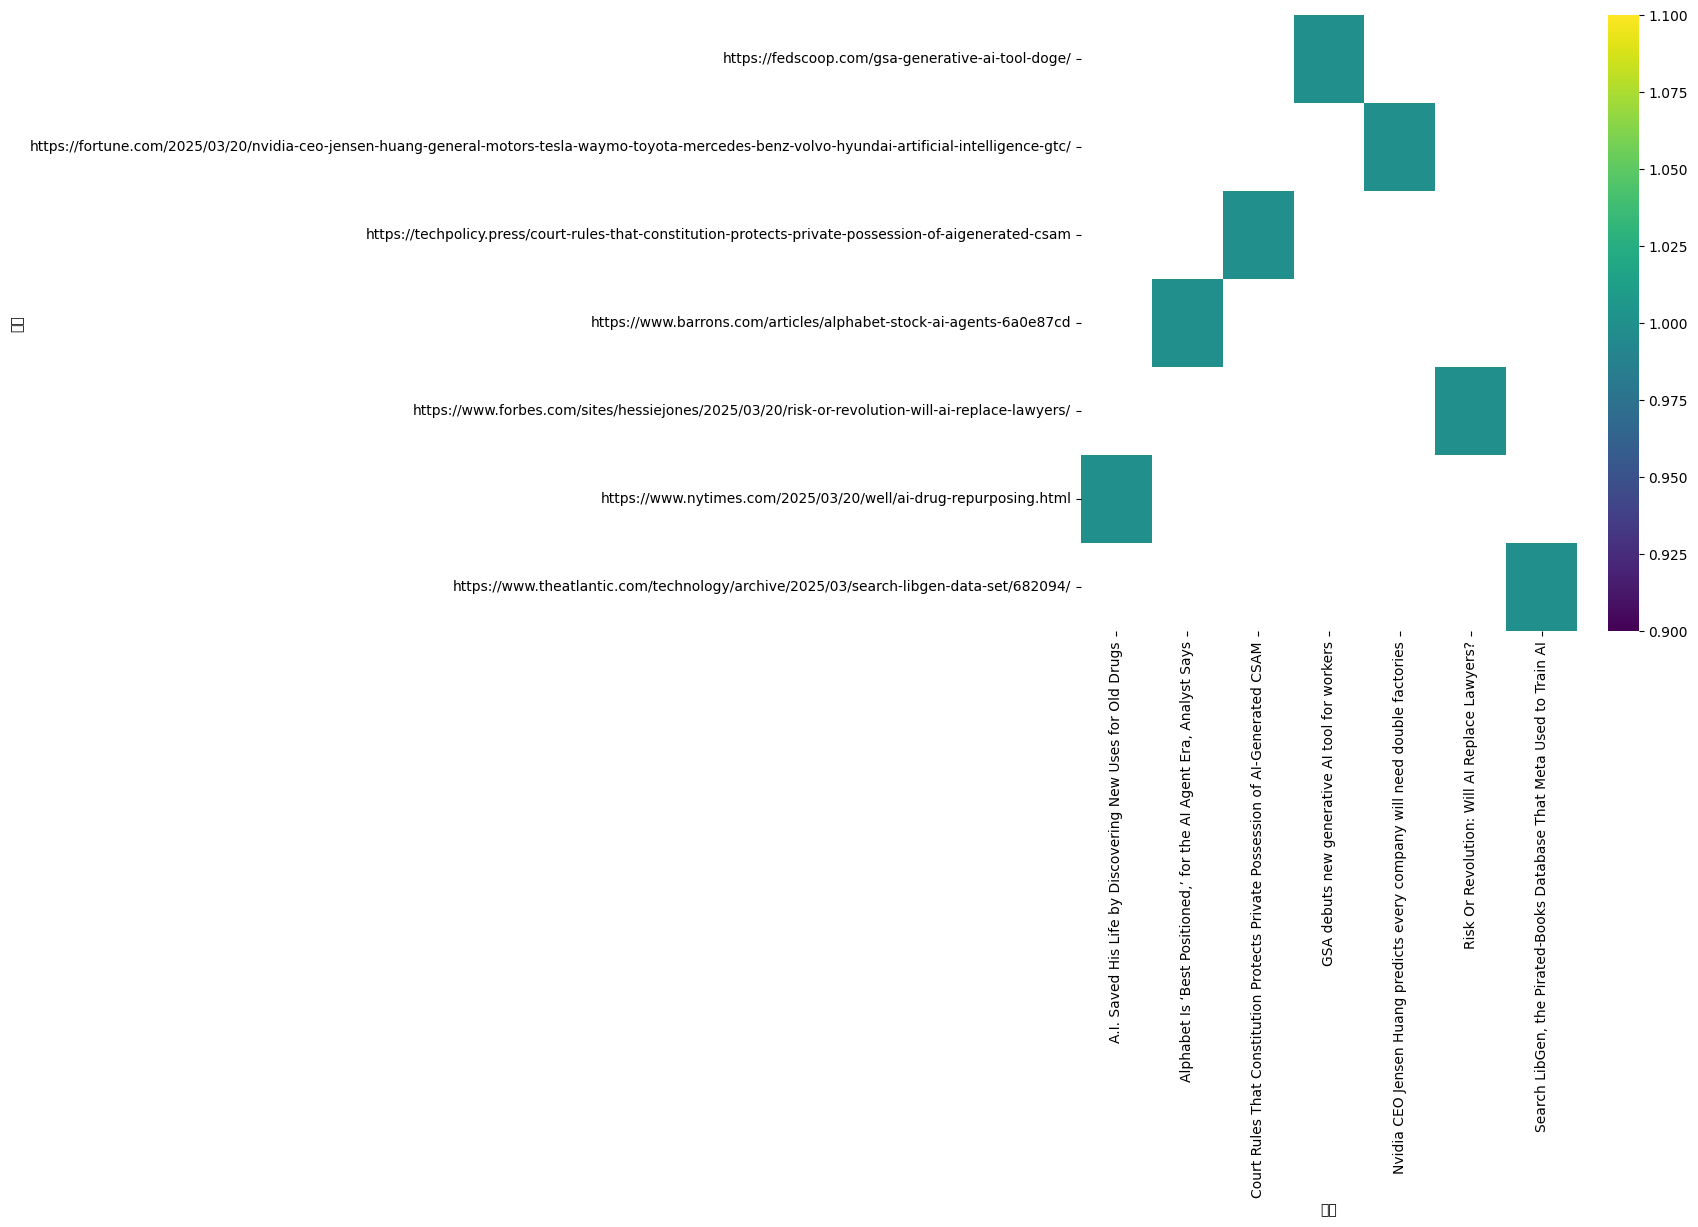

In [ ]:
# @title 제목 vs 링크

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['링크'].value_counts()
    for x_label, grp in news_df.groupby('제목')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('제목')
_ = plt.ylabel('링크')